In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('file1.csv')

In [3]:
data.head()

,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [4]:
# Convert the 'class' column to 0 and 1
data['class'] = data['class'].map({'suicide': 1, 'non-suicide': 0})

In [5]:
# Drop the 'Unnamed: 0' column
data = data.drop(columns=['Unnamed: 0'])

In [6]:
# Check the modified DataFrame
print(data.head())

                                                text  class
0  dont know7 month self harm free urg get strong...      1
1  start becom rich start compani becom 16 afford...      0
2  poem haiku umegamedev hi hello hello stop fuck...      0
3  ive honestli got idea anymoreit feel everyon f...      1
4  ever cri like think unfair life cri cant cri e...      0


## Data Preprocessing

In [7]:
data.shape

(10000, 2)

In [8]:
data.duplicated().sum()

1

In [9]:
# Drop duplicate rows
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

text     1
class    0
dtype: int64

In [14]:
# Drop rows with any null values
data = data.dropna()

In [15]:
data.isnull().sum()

text     0
class    0
dtype: int64

### Text Preprocessing

In [16]:
import re
import string

In [17]:
data["text"].head(5)

0    dont know7 month self harm free urg get strong...
1    start becom rich start compani becom 16 afford...
2    poem haiku umegamedev hi hello hello stop fuck...
3    ive honestli got idea anymoreit feel everyon f...
4    ever cri like think unfair life cri cant cri e...
Name: text, dtype: object

### Convert uppercase to lowercase

In [18]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [20]:
data["text"].head(5)

0    dont know7 month self harm free urg get strong...
1    start becom rich start compani becom 16 afford...
2    poem haiku umegamedev hi hello hello stop fuck...
3    ive honestli got idea anymoreit feel everyon f...
4    ever cri like think unfair life cri cant cri e...
Name: text, dtype: object

### Remove links

In [21]:
data["text"] = data['text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [22]:
data["text"].head(5)

0    dont know7 month self harm free urg get strong...
1    start becom rich start compani becom 16 afford...
2    poem haiku umegamedev hi hello hello stop fuck...
3    ive honestli got idea anymoreit feel everyon f...
4    ever cri like think unfair life cri cant cri e...
Name: text, dtype: object

### Remove punctuations

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["text"] = data["text"].apply(remove_punctuations)

In [25]:
data["text"].tail(10)

9990    parent complain way much probabl sound controv...
9991    poll post 1 remov view pollhttpswwwredditcompo...
9992    like compliment straight guy mean im flirt mea...
9993    search tati mcquay instagram tell she hot asf ...
9994    aliv true hellim dumb ass depress ass good slu...
9995    teenag femal like decis teenag femal make movi...
9996    watch english teacher crash burn highlight mor...
9997    controli feel like everyon tell live day day c...
9998    keep nightmar trigger warn nightmar 1 stitch a...
9999                 im lone bore need someon talk im 14m
Name: text, dtype: object

### Remove numbers

In [26]:
data["text"] = data['text'].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_489041/736649701.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["text"] = data['text'].str.replace('\d+', '', regex=True)


In [27]:
data["text"].tail(10)

9990    parent complain way much probabl sound controv...
9991    poll post  remov view pollhttpswwwredditcompol...
9992    like compliment straight guy mean im flirt mea...
9993    search tati mcquay instagram tell she hot asf ...
9994    aliv true hellim dumb ass depress ass good slu...
9995    teenag femal like decis teenag femal make movi...
9996    watch english teacher crash burn highlight mor...
9997    controli feel like everyon tell live day day c...
9998    keep nightmar trigger warn nightmar  stitch al...
9999                   im lone bore need someon talk im m
Name: text, dtype: object

### Remove stopwords

In [25]:
# !pip install nltk

In [28]:
import nltk

In [29]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [31]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [35]:
data["text"].head()

0    dont know month self harm free urg get stronge...
1    start becom rich start compani becom afford bi...
2    poem haiku umegamedev hi hello hello stop fuck...
3    ive honestli got idea anymoreit feel everyon f...
4    ever cri like think unfair life cri cant cri e...
Name: text, dtype: object

### Stemming

In [36]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [37]:
data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [38]:
data["text"].head()

0    dont know month self harm free urg get stronge...
1    start becom rich start compani becom afford bi...
2    poem haiku umegamedev hi hello hello stop fuck...
3    ive honestli got idea anymoreit feel everyon f...
4    ever cri like think unfair life cri cant cri e...
Name: text, dtype: object

In [39]:
data

,text,class
0,dont know month self harm free urg get stronge...,1
1,start becom rich start compani becom afford bi...,0
2,poem haiku umegamedev hi hello hello stop fuck...,0
3,ive honestli got idea anymoreit feel everyon f...,1
4,ever cri like think unfair life cri cant cri e...,0
...,...,...
9995,teenag femal like deci teenag femal make movi ...,0
9996,watch english teacher crash burn highlight mor...,0
9997,controli feel like everyon tell live day day c...,1
9998,keep nightmar trigger warn nightmar stitch alo...,0


### Building Vacabulary

In [40]:
from collections import Counter
vocab = Counter()

In [41]:
vocab

Counter()

In [42]:
for sentence in data['text']:
    vocab.update(sentence.split())

In [43]:
len(vocab)

21916

In [44]:
data.shape

(9998, 2)

In [45]:
tokens = [key for key in vocab if vocab[key] > 10]

In [46]:
tokens

['dont',
 'know',
 'month',
 'self',
 'harm',
 'free',
 'urg',
 'get',
 'stronger',
 'everi',
 'day',
 'past',
 'ive',
 'shit',
 'famili',
 'stress',
 'especi',
 'nephew',
 'mum',
 'full',
 'custodi',
 'told',
 'go',
 'kill',
 'numer',
 'time',
 'wish',
 'easi',
 'partner',
 'trigger',
 'want',
 'scream',
 'cri',
 'live',
 'near',
 'wood',
 'could',
 'till',
 'cant',
 'possibl',
 'anymor',
 'cop',
 'probabl',
 'call',
 'oh',
 'depress',
 'doesnt',
 'realli',
 'im',
 'feel',
 'moment',
 'would',
 'come',
 'make',
 'sure',
 'ok',
 'fuck',
 'annoy',
 'small',
 'stupid',
 'thing',
 'even',
 'post',
 'start',
 'becom',
 'rich',
 'compani',
 'afford',
 'big',
 'van',
 'trip',
 'friend',
 'left',
 'work',
 'poem',
 'hi',
 'hello',
 'stop',
 'say',
 'honestli',
 'got',
 'idea',
 'everyon',
 'fake',
 'like',
 'sometim',
 'hear',
 'brain',
 'speak',
 'hey',
 'peopl',
 'talk',
 'far',
 'help',
 'music',
 'kinda',
 'good',
 'deserv',
 'nobodi',
 'need',
 'suicid',
 'push',
 'away',
 'use',
 'anyon

In [47]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'vocabulary.txt')

### Divide dataset 

In [48]:
X = data['text']
y = data['class']

In [49]:
# !pip install scikit-learn

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
X_train

2045    guy told time stop ask number get annoy sawara...
4463    point beg peopl help kill everi daywhat point ...
9140    petit moder add stori flair flair would use pe...
9769    wrote littl program send text messag parent lo...
8483    dont want diei dont want die dont want surviv ...
                              ...                        
8673    id like know least someon love amdur day wait ...
834                            furri bad peopl get offend
5959    dont know ill last yearm us resid live ulcer c...
5244    suicid ideat cross contempl alway dealt low gr...
1071    honestli think would better wasnt aliv gotten ...
Name: text, Length: 7998, dtype: object

In [48]:
X_test

8481    sister think depress dysthymia lol ok mr docto...
662     never open mouth ever againani time talk feel ...
8720    happi th juli great day dieiv think think toda...
4544    lgtbq alli lgtbq alli like dont think fulli un...
8643    im tire cowardsometim like fool think want sur...
                              ...                        
1993    rocket mani realli bad final exam work extrem ...
8635    pro con date mebe friend actual reason prosi l...
3908    nvm ill take shower yet mom take shower time r...
6218    im fuck get wor turn ill alon next week realli...
9601    potenti pedophileim current feel might actual ...
Name: text, Length: 2000, dtype: object

In [49]:
y_train

2787    1
3881    1
8786    1
9816    0
3010    1
       ..
3102    1
4236    1
8776    0
5726    1
1201    1
Name: class, Length: 7998, dtype: int64

### Vectorization 

In [53]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []  # Corrected this line
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [54]:
vectorized_x_train = vectorizer(X_train, tokens)

In [55]:
vectorized_x_test = vectorizer(X_test, tokens)

In [56]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_train

2045    0
4463    1
9140    0
9769    1
8483    1
       ..
8673    1
834     0
5959    1
5244    1
1071    1
Name: class, Length: 7998, dtype: int64

In [58]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_test

3217    0
2323    0
5529    0
7575    1
1377    1
       ..
2368    1
9307    0
2592    1
9456    0
1061    0
Name: class, Length: 2000, dtype: int64

In [60]:
y_train.value_counts()

class
0    4056
1    3942
Name: count, dtype: int64

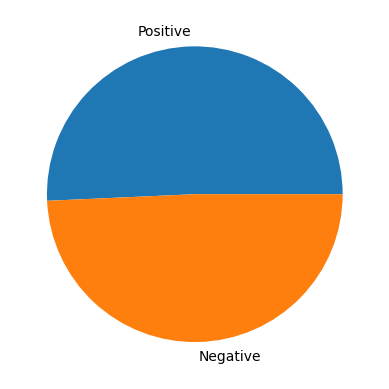

In [61]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset 

In [62]:
# !pip install imbalanced-learn

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(8112, 3448) (8112,)


In [64]:
y_train_smote.value_counts()

class
0    4056
1    4056
Name: count, dtype: int64

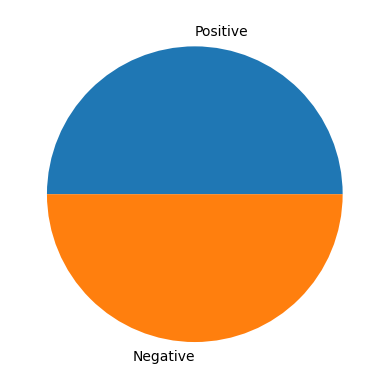

In [65]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [66]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.6333938, 0.6333938, ..., 0.       , 0.       ,
        0.       ],
       [1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [67]:
y_train_smote

0       0
1       1
2       0
3       1
4       1
       ..
8107    1
8108    1
8109    1
8110    1
8111    1
Name: class, Length: 8112, dtype: int64

In [68]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
y_test

3217    0
2323    0
5529    0
7575    1
1377    1
       ..
2368    1
9307    0
2592    1
9456    0
1061    0
Name: class, Length: 2000, dtype: int64

## Model Training and Evaluation 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression 

In [73]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.97
	Precision = 0.984
	Recall = 0.956
	F1-Score = 0.97
Testing Scores:
	Accuracy = 0.904
	Precision = 0.924
	Recall = 0.882
	F1-Score = 0.903


### Naive Bayes 

In [74]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.92
	Precision = 0.901
	Recall = 0.943
	F1-Score = 0.922
Testing Scores:
	Accuracy = 0.893
	Precision = 0.873
	Recall = 0.924
	F1-Score = 0.897


### Decision Tree 

In [75]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.801
	Precision = 0.801
	Recall = 0.807
	F1-Score = 0.804


### Random Forest 

In [76]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.852
	Precision = 0.841
	Recall = 0.87
	F1-Score = 0.855


### Support Vector Machine 

In [77]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.951
	Precision = 0.98
	Recall = 0.921
	F1-Score = 0.949
Testing Scores:
	Accuracy = 0.895
	Precision = 0.913
	Recall = 0.875
	F1-Score = 0.894


In [78]:
import pickle

with open('model.pickle', 'wb') as file:
    pickle.dump(lr, file)


In [75]:
import numpy as np
import pandas as pd
import re
import string
import pickle

In [76]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [77]:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

In [78]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [79]:
vocab = pd.read_csv('vocabulary.txt', header=None)
tokens = vocab[0].tolist()

In [80]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [81]:
def preprocessing(text):
    data = pd.DataFrame([text], columns=['text'])
    data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    data["text"] = data['text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
    data["text"] = data["text"].apply(remove_punctuations)
    data["text"] = data['text'].str.replace('\d+', '', regex=True)
    data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
    return data["text"]

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_36480/3977077925.py:6: SyntaxWarning: invalid escape sequence '\d'
  data["text"] = data['text'].str.replace('\d+', '', regex=True)


In [82]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [83]:
def get_prediction(vectorized_text):
    prediction = model.predict(vectorized_text)
    if prediction == 1:
        return 'Suicidal message'
    else:
        return 'Non - suicidal message'

In [84]:
txt = "i am tired of this life"
preprocessed_txt = preprocessing(txt)
vectorized_txt = vectorizer(preprocessed_txt, tokens)
prediction = get_prediction(vectorized_txt)
prediction

'Suicidal message'